## Importing Necessary Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the csv file into a panda dataframe

In [99]:
data = pd.read_csv("titanic.csv")
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [100]:
data1 = data.drop(['Name','PassengerId', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = data['Survived']
data_cat =data1.select_dtypes(include=['object'])  
data_num1 =data1.select_dtypes(include=['number'])
data_num = data_num1.fillna(data_num1.median())
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_num_norm = (data_num - mean) / std

data_cat_proc = pd.get_dummies(data_cat, drop_first=True) 
boolean_cols = data_cat_proc.columns[data_cat_proc.dtypes == 'bool']
data_cat_proc[boolean_cols] = data_cat_proc[boolean_cols].astype(int)
data_proc = pd.concat([data_num_norm, data_cat_proc], axis=1) 

In [101]:
test_size = 0.3

n_samples = data_proc.shape[0]

n_test_samples = int(n_samples * test_size)
print(n_test_samples)

indices = np.arange(n_samples)
np.random.shuffle(indices)

# Split the data into training and testing sets
train_indices = indices[n_test_samples:]
test_indices = indices[:n_test_samples]

X_train = data_proc.iloc[train_indices]
y_train = y.iloc[train_indices]


X_test = data_proc.iloc[test_indices]
y_test = y.iloc[test_indices]
ll_values = []

267


In [102]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def log_loss(y_true, y_pred):
    # Calculate the log loss
    epsilon = 1e-15
    loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
    return loss

In [103]:
class LogisticRegression:
    def __init__(self, lr = 0.1, n_iters = 700):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        prev_mse = float('inf')
        for i in range(self.n_iters):
            linearpred = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linearpred)
            delw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            delb = (1/n_samples)*np.sum(y_predicted - y)
            self.weights = self.weights - self.lr*delw
            self.bias = self.bias - self.lr*delb
            loglossv = log_loss(y, y_predicted)
            ll_values.append(loglossv)
#            if i > 0:
#                if prev_mse - mse < 1e3:
#                    break
#            prev_mse = mse
    def predict(self, X):
        linearpred = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linearpred)
        predicted = [0 if y<=0.5 else 1 for y in y_predicted]
        return predicted

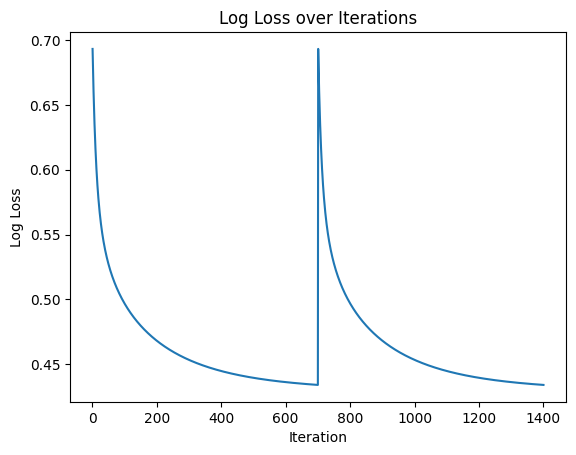

Precision: 0.7064220183486238
Recall: 0.7264150943396226


TypeError: can only concatenate str (not "numpy.float64") to str

In [107]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)
def f1_score(predictions, y_test):
    predictions_array = np.array(predictions)
    y_test_array = np.array(y_test)
    tp = np.sum((y_test_array == 1) & (predictions_array == 1))
    fp = np.sum((y_test_array == 0) & (predictions_array == 1))
    tn = np.sum((y_test_array == 0) & (predictions_array == 0))
    fn = np.sum((y_test_array == 1) & (predictions_array == 0))  
    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    print("Precision:", precision)
    print("Recall:", recall)
    f1 = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    return f1
plt.plot(range(1, len(ll_values) + 1), ll_values)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Log Loss over Iterations")
plt.show()
f1 = f1_score(predictions, y_test)
print("F1 score:",f1)

In [105]:
predictions_array = np.array(predictions)
y_test_array = np.array(y_test)

true_positives = np.sum((y_test_array == 1) & (predictions_array == 1))
false_positives = np.sum((y_test_array == 0) & (predictions_array == 1))
true_negatives = np.sum((y_test_array == 0) & (predictions_array == 0))
false_negatives = np.sum((y_test_array == 1) & (predictions_array == 0))
precision = 

print("True Positives:", true_positives)

SyntaxError: invalid syntax (3253189733.py, line 8)